# Frequencies
Understand which frequencies are most important in the time series and select them

In [2]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
df_train = pd.read_csv('data\\train.csv')
# df_train.to_parquet('train.parquet')
# df_train = pd.read_parquet('train.parquet')
df_ts = df_train.iloc[:,5:] # timeseries features only
df_train['y_s'] = df_train.y > 1 # simplified y: label 0 for 1 and 1 for 2,3 

# fit model

In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from util import FourierTransformer


params = {'C' : np.linspace(0.1,3,50),
          'kernel':['poly','rbf','linear']}


In [5]:
pipe = make_pipeline(
    FourierTransformer(),
    SVC(class_weight='balanced')
)

pipe.steps

[('fouriertransformer', FourierTransformer()),
 ('svc', SVC(class_weight='balanced'))]

In [24]:
params = {
    # 'svc__C' : np.linspace(0.5,2,4),
    # 'svc__kernel':['poly','rbf','linear'],
    # 'fouriertransformer__k': [i for i in range(3,16,10)],
    'fouriertransformer__aggregate': ['union', 'intersection', 'median', 'exclusive']
    }

In [25]:
skf = StratifiedKFold(n_splits=4)
cv = GridSearchCV(
    pipe, 
    param_grid=params, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    cv=skf.split(df_ts, df_train.y)
)
cv.fit(df_ts.values,df_train.y)

cv.best_params_, cv.best_score_

C:\Users\laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

({'fouriertransformer__aggregate': 'exclusive'}, 0.38766427718040625)

In [9]:
pipe.set_params(**{
    'fouriertransformer__k': 20,
    'fouriertransformer__aggregate': 'exclusive'
})
pipe.fit(df_ts.values, df_train.y)

Pipeline(steps=[('fouriertransformer',
                 FourierTransformer(aggregate='exclusive', k=20)),
                ('svc', SVC(class_weight='balanced'))])

In [15]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay

y_hat = pipe.predict(df_ts.values)

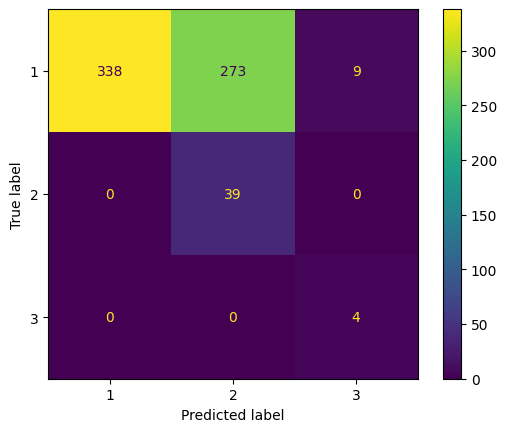

In [17]:
balanced_accuracy_score(df_train.y, y_hat)
ConfusionMatrixDisplay.from_predictions(df_train.y, y_hat)

# Submission

In [ ]:
pipe.set_params(**{
    'fouriertransformer__k': 20,
    'fouriertransformer__aggregate': 'exclusive'
})
pipe.fit(df_ts.values, df_train.y)

SVC(C=2, class_weight='balanced')

In [18]:
df_sub = pd.read_csv('data\\test.csv')


In [23]:
df_sub.iloc[:,4:]

,E1A1,E1A2,E1A3,E1A4,E1A5,E1A6,E1A7,E1A8,E1A9,E1A10,...,M2V2039,M2V2040,M2V2041,M2V2042,M2V2043,M2V2044,M2V2045,M2V2046,M2V2047,M2V2048
0,0.044012,-0.042142,-0.360478,-0.388143,-0.234347,0.008777,0.141615,0.380787,0.283888,0.121089,...,0.145522,-0.367679,0.032325,0.351489,-0.191679,-0.238662,0.362742,0.046373,-0.353114,0.144611
1,0.354656,-0.258057,-0.435417,0.105555,0.306157,0.133404,-0.175410,-0.278768,0.242567,0.285385,...,-0.209803,-0.317693,-0.123496,0.213077,0.269170,0.270980,-0.004193,-0.321301,-0.250778,-0.114053
2,-0.072705,0.136741,0.098616,0.292389,0.169617,0.270838,0.346235,0.341641,0.138297,-0.267725,...,0.169434,0.403928,0.340472,0.022822,-0.110036,0.275612,0.503778,0.373271,0.008208,-0.096481
3,0.776889,0.264793,1.252166,0.038967,0.915882,0.264486,0.860960,0.544313,0.908211,0.070264,...,-0.303733,-0.003635,-0.152131,-0.214604,0.067547,-0.139258,0.134942,0.715979,-0.044375,-0.040361
4,0.767639,1.278452,-1.360223,0.214819,-0.767639,0.574346,-0.269384,-0.658062,-0.520231,-0.389276,...,0.102140,-0.055244,0.151701,-0.126399,0.191852,-0.127218,0.298706,-0.073931,0.208696,-0.041512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-1.780864,1.005961,0.224570,0.168402,-0.247760,-0.679507,-1.360813,-0.025952,0.210244,0.533471,...,0.097810,0.109827,0.124577,-0.092804,-0.010326,0.332883,0.545942,0.373944,0.113656,-0.187434
351,-0.727646,-0.121540,0.159425,0.625580,-0.352326,-0.139818,-0.876538,-0.112956,-0.562735,-0.675973,...,-0.074978,-0.307108,-0.182105,0.375124,0.283892,0.454548,0.262555,0.494833,0.296610,0.043673
352,0.101757,0.175610,0.377732,0.585461,0.144735,0.253156,0.379535,0.277029,0.208634,0.117021,...,0.066182,0.063941,0.091446,0.066662,0.032533,0.055569,-0.026244,-0.040686,-0.011396,-0.022452
353,0.917198,1.665725,2.534468,1.889459,0.023705,-1.054286,-0.546018,-1.084420,0.581015,0.247748,...,-0.123601,0.429097,-0.424900,-0.112483,-0.047660,0.056007,-0.392076,0.248702,-0.534772,0.030336


In [22]:
from datetime import datetime
y_sub = pipe.predict(df_sub.iloc[:,4:].values)
submission_df = pd.DataFrame(y_sub,columns=['y'])
submission_df['id'] = df_sub.id
submission_df.set_index('id', inplace=True)
submission_df.y = submission_df.y + 1
submission_df.to_csv(f'data\\submissions\\summary_{datetime.now().strftime("%H.%M_%d")}.csv')